## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [23]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.txt', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [24]:
df.price = np.log1p(df.price.values)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

df_full_train, df_test = train_test_split(df,test_size = 0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values


del df_train['price']
del df_val['price']
del df_test['price']

train_dict = df_train.to_dict(orient='records')
train_val = df_val.to_dict(orient='records')




Now, use `DictVectorizer` to turn train and validation into matrices:

In [26]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)


In [27]:
X_train[0]

array([ 3.630000e+02,  1.000000e+00,  4.076434e+01, -7.392132e+01,
        4.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        1.000000e+00,  0.000000e+00,  3.000000e+01,  3.200000e-01,
        1.000000e+00,  0.000000e+00,  0.000000e+00])

In [28]:
dv.get_feature_names_out()

array(['availability_365', 'calculated_host_listings_count', 'latitude',
       'longitude', 'minimum_nights', 'neighbourhood_group=Bronx',
       'neighbourhood_group=Brooklyn', 'neighbourhood_group=Manhattan',
       'neighbourhood_group=Queens', 'neighbourhood_group=Staten Island',
       'number_of_reviews', 'reviews_per_month',
       'room_type=Entire home/apt', 'room_type=Private room',
       'room_type=Shared room'], dtype=object)

In [29]:
df.availability_365.unique()

array([365, 355, 194,   0, 129, 220, 188,   6,  39, 314, 333,  46, 321,
        12,  21, 249, 347, 364, 304, 233,  85,  75, 311,  67, 255, 284,
       359, 269, 340,  22,  96, 345, 273, 309,  95, 215, 265, 192, 251,
       302, 140, 234, 257,  30, 301, 294, 320, 154, 263, 180, 231, 297,
       292, 191,  72, 362, 336, 116,  88, 224, 322, 324, 132, 295, 238,
       209, 328,  38,   7, 272,  26, 288, 317, 207, 185, 158,   9, 198,
       219, 342, 312, 243, 152, 137, 222, 346, 208, 279, 250, 164, 298,
       260, 107, 199, 299,  20, 318, 216, 245, 189, 307, 310, 213, 278,
        16, 178, 275, 163,  34, 280,   1, 170, 214, 248, 262, 339,  10,
       290, 230,  53, 126,   3,  37, 353, 177, 246, 225,  18, 343, 326,
       162, 240, 363, 247, 323, 125,  91, 286,  60,  58, 351, 201, 232,
       258, 341, 244, 329, 253, 348,   2,  56,  68, 360,  76,  15, 226,
       349,  11, 316, 281, 287,  14,  86, 261, 331,  51, 254, 103,  42,
       325,  35, 203,   5, 276, 102,  71,  78,   8, 182,  79,  4

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [31]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
y_pred = dt.predict(X_val)

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val,y_pred))
rmse

0.5488190627763702

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=1,n_jobs=-1)

In [35]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [36]:
y_pred = rf.predict(X_val)

In [37]:
rmse = np.sqrt(mean_squared_error(y_val,y_pred))
rmse

0.4615632303514057

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [39]:
scores = []
for i in range (10,201,10):
    rf = RandomForestRegressor(n_estimators=i, random_state=1,n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val,y_pred))
    scores.append((i,round(rmse,3)))

In [40]:
df_scores = pd.DataFrame(scores)

In [41]:
df_scores

,0,1
0,10,0.462
1,20,0.448
2,30,0.446
3,40,0.444
4,50,0.442
5,60,0.442
6,70,0.441
7,80,0.441
8,90,0.441
9,100,0.440


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [42]:
scores = []
d= [10, 15, 20, 25]
for max_d in d:
    for i in range (10,201,10):
        rf = RandomForestRegressor(n_estimators=i, max_depth=max_d, random_state=1,n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val,y_pred))
        scores.append((i,max_d,round(rmse,3)))

In [51]:
columns = ['n_est','max_d','rmse']
df_scores_2 = pd.DataFrame(scores,columns = columns)

In [52]:
df_scores_2

,n_est,max_d,rmse
0,10,10,0.446
1,20,10,0.442
2,30,10,0.441
3,40,10,0.441
4,50,10,0.441
...,...,...,...
75,160,25,0.439
76,170,25,0.439
77,180,25,0.439
78,190,25,0.439


In [55]:
df_pivot=df_scores_2.pivot('max_d','n_est','rmse')

<AxesSubplot:xlabel='n_est', ylabel='max_d'>

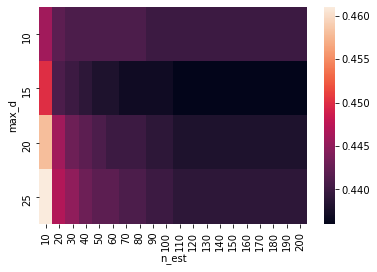

In [57]:
import seaborn as sns
sns.heatmap(df_pivot)

In [63]:
df_pivot

n_est,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
max_d,,,,,,,,,,,,,,,,,,,,
10,0.446,0.442,0.441,0.441,0.441,0.441,0.441,0.441,0.440,0.440,0.440,0.440,0.440,0.440,0.440,0.440,0.440,0.440,0.440,0.440
15,0.450,0.441,0.440,0.439,0.438,0.438,0.437,0.437,0.437,0.437,0.436,0.436,0.436,0.436,0.436,0.436,0.436,0.436,0.436,0.436
20,0.458,0.446,0.443,0.442,0.441,0.440,0.440,0.440,0.439,0.439,0.438,0.438,0.438,0.438,0.438,0.438,0.438,0.438,0.438,0.438
25,0.461,0.447,0.445,0.443,0.442,0.442,0.441,0.441,0.440,0.440,0.439,0.439,0.439,0.439,0.439,0.439,0.439,0.439,0.439,0.439


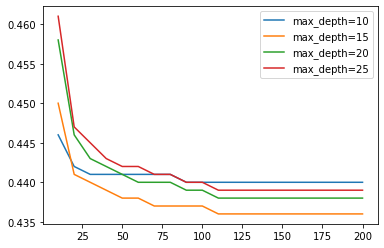

In [77]:
for md in [10,15,20,25]:
    df_subset = df_scores_2[df_scores_2.max_d ==md]
    plt.plot(df_subset.n_est,df_subset.rmse,label='max_depth=%d' % md)
    plt.legend()

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [80]:
rf = RandomForestRegressor(n_estimators=10, max_depth = 20, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [88]:
np.set_printoptions(suppress=True)

In [89]:
feat_imp = rf.feature_importances_

In [90]:
feat_imp

array([0.07626395, 0.03010193, 0.15277535, 0.15410096, 0.05325192,
       0.00026485, 0.00096596, 0.03404727, 0.0011661 , 0.00008403,
       0.04159424, 0.05443039, 0.39189819, 0.00403203, 0.00502284])

In [95]:
imp_list = list(zip(dv.get_feature_names(), feat_imp))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [98]:
df_imp = pd.DataFrame(imp_list,columns = ['feature','importance'])

In [99]:
df_imp

,feature,importance
0,availability_365,0.076264
1,calculated_host_listings_count,0.030102
2,latitude,0.152775
3,longitude,0.154101
4,minimum_nights,0.053252
5,neighbourhood_group=Bronx,0.000265
6,neighbourhood_group=Brooklyn,0.000966
7,neighbourhood_group=Manhattan,0.034047
8,neighbourhood_group=Queens,0.001166
9,neighbourhood_group=Staten Island,0.000084


What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 4,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [ ]:
!pip install xgboost

In [101]:
import xgboost as xgb

In [109]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watch_list = [(dtrain, 'train'),(dval, 'val)')]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [113]:


xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list, verbose_eval=5, num_boost_round=100)

[0]	train-rmse:3.02752	val)-rmse:3.02415
[5]	train-rmse:0.67490	val)-rmse:0.67752
[10]	train-rmse:0.43912	val)-rmse:0.44981
[15]	train-rmse:0.42259	val)-rmse:0.43827
[20]	train-rmse:0.41716	val)-rmse:0.43691
[25]	train-rmse:0.41365	val)-rmse:0.43621
[30]	train-rmse:0.40712	val)-rmse:0.43543
[35]	train-rmse:0.40444	val)-rmse:0.43510
[40]	train-rmse:0.40103	val)-rmse:0.43466
[45]	train-rmse:0.39723	val)-rmse:0.43371
[50]	train-rmse:0.39446	val)-rmse:0.43384
[55]	train-rmse:0.39129	val)-rmse:0.43378
[60]	train-rmse:0.38743	val)-rmse:0.43404
[65]	train-rmse:0.38421	val)-rmse:0.43450
[70]	train-rmse:0.38117	val)-rmse:0.43467
[75]	train-rmse:0.37801	val)-rmse:0.43489
[80]	train-rmse:0.37668	val)-rmse:0.43526
[85]	train-rmse:0.37259	val)-rmse:0.43537
[90]	train-rmse:0.36998	val)-rmse:0.43539
[95]	train-rmse:0.36742	val)-rmse:0.43579
[99]	train-rmse:0.36478	val)-rmse:0.43621


In [106]:
y_pred = model.predict(dval)

In [107]:
rmse = np.sqrt(mean_squared_error(y_val,y_pred))

In [96]:
eta_rmse = [(0.3,rmse)]

In [104]:
eta_rmse.append((0.01, rmse))

In [105]:
eta_rmse

[(0.3, 0.1902794658815014),
 (0.1, 0.18705326790701154),
 (0.01, 2.6583751556838666)]

In [110]:
watch_list = [(dtrain, 'train'),(dval, 'val)')]

Now change `eta` first to `0.1` and then to `0.01`

In [ ]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}



In [116]:
rmse_list = []
for et in [0.3,0.1,0.01]:
    xgb_params['eta'] = et
    model = xgb.train(xgb_para ms, dtrain, evals=watch_list, verbose_eval=5, num_boost_round=100)
    y_pred = model.predict(dval)
    rmse = np.sqrt(mean_squared_error(y_val,y_pred))
    rmse_list.append((et,round(rmse,3)))
    

[0]	train-rmse:3.02752	val)-rmse:3.02415
[5]	train-rmse:0.67490	val)-rmse:0.67752
[10]	train-rmse:0.43912	val)-rmse:0.44981
[15]	train-rmse:0.42259	val)-rmse:0.43827
[20]	train-rmse:0.41716	val)-rmse:0.43691
[25]	train-rmse:0.41365	val)-rmse:0.43621
[30]	train-rmse:0.40712	val)-rmse:0.43543
[35]	train-rmse:0.40444	val)-rmse:0.43510
[40]	train-rmse:0.40103	val)-rmse:0.43466
[45]	train-rmse:0.39723	val)-rmse:0.43371
[50]	train-rmse:0.39446	val)-rmse:0.43384
[55]	train-rmse:0.39129	val)-rmse:0.43378
[60]	train-rmse:0.38743	val)-rmse:0.43404
[65]	train-rmse:0.38421	val)-rmse:0.43450
[70]	train-rmse:0.38117	val)-rmse:0.43467
[75]	train-rmse:0.37801	val)-rmse:0.43489
[80]	train-rmse:0.37668	val)-rmse:0.43526
[85]	train-rmse:0.37259	val)-rmse:0.43537
[90]	train-rmse:0.36998	val)-rmse:0.43539
[95]	train-rmse:0.36742	val)-rmse:0.43579
[99]	train-rmse:0.36478	val)-rmse:0.43621
[0]	train-rmse:3.87217	val)-rmse:3.86889
[5]	train-rmse:2.31905	val)-rmse:2.31692
[10]	train-rmse:1.41910	val)-rmse:1.41

In [117]:
rmse_list

[(0.3, 0.436), (0.1, 0.432), (0.01, 1.63)]

In [181]:
def parse_xgb_output(output):
    results = []
    
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1]) 
        results.append((it,train,val))
                       
                       
    columns = ['num_iter','rmse_train','rmse_val']
    df_results = pd.DataFrame(results,columns=columns)
    return df_results

In [215]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list,  num_boost_round=100)

In [216]:
df_score = parse_xgb_output(output)

In [196]:
df_score

,num_iter,rmse_train,rmse_val
0,0,4.25335,4.25010
1,1,4.21140,4.20814
2,2,4.16988,4.16661
3,3,4.12877,4.12551
4,4,4.08808,4.08481
...,...,...,...
95,95,1.69373,1.69214
96,96,1.67804,1.67647
97,97,1.66251,1.66095
98,98,1.64716,1.64563


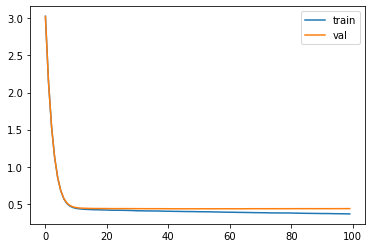

In [217]:
plt.plot(df_score.num_iter, df_score.rmse_train, label= 'train')
plt.plot(df_score.num_iter, df_score.rmse_val, label= 'val')
plt.legend()



In [201]:
xgb_scores = {}

In [207]:
key = 'eta=%s' % (xgb_params['eta'])
xgb_scores[key] = parse_xgb_output(output)

In [213]:
xgb_scores['eta=0.3']

,num_iter,rmse_train,rmse_val
0,0,3.02752,3.02415
1,1,2.14666,2.14390
2,2,1.53879,1.53721
3,3,1.12557,1.12523
4,4,0.85100,0.85175
...,...,...,...
95,95,0.36742,0.43579
96,96,0.36698,0.43584
97,97,0.36644,0.43595
98,98,0.36582,0.43597


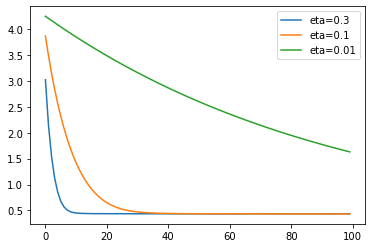

In [219]:
for key, df_scores in xgb_scores.items():
    plt.plot(df_scores.num_iter, df_scores.rmse_val, label= key)
#plt.ylim(0.4,1)
plt.legend()

What's the best eta?

* 0.3
* 0.1
* 0.01

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

